In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_util import *
from planar_utils import plot_decision_boundary, load_planar_dataset, load_extra_datasets

import dnn

%reload_ext autoreload
%autoreload 2

%matplotlib inline

np.random.seed(33) 

### LOADING AND PLOTTING THE DATA

Text(0.5, 1.0, 'test data')

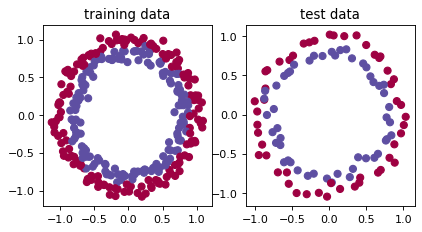

In [2]:
X_train, Y_train, X_test, Y_test = load_dataset();

#X_train = dnn.normalize(X_train)
#X_test = dnn.normalize(X_test)

X, Y = X_train, Y_train

# Visualize the data
plt.figure(figsize=(6,3), dpi=80);

ax1 = plt.subplot(1,2,1)
ax1.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);
ax1.set_title("training data")

ax2 = plt.subplot(1,2,2)
ax2.scatter(X_test[0, :], X_test[1, :], c=Y_test.ravel(), s=40, cmap=plt.cm.Spectral);
ax2.set_title("test data")

### BUILDING A NEURAL NETWORK

In [3]:
relue = dnn.relue
sigmoid = dnn.sigmoid
tanh = dnn.tanh

# Neural network architecture #
layers = [(X.shape[0], None), (10, relue), (5, tanh), (1, sigmoid)]

# drop-out probabilities #
#keep_probs = []
keep_probs = [1, .8, 0.9, 1]

### DIFINING OPTIMIZERS

In [4]:
num_samples = Y.shape[1]

gd = {'type':'gd', 'mini_batch_size':64, 'learning_rate':0.01}
sgd = {'type':'gd', 'mini_batch_size':1, 'learning_rate':0.01}
gd_batch = {'type':'gd', 'mini_batch_size':num_samples, 'learning_rate':0.01}
momentum = {'type':'momentum', 'mini_batch_size':64, 'learning_rate':0.01, 'beta0':.9}
momentum_batch = {'type':'momentum', 'mini_batch_size':num_samples, 'learning_rate':1, 'beta0':.9}
adam = {'type':'adam', 'mini_batch_size':64, 'learning_rate':0.01, 'beta1':.9, 'beta2':.999}
adam_batch = {'type':'adam', 'mini_batch_size':num_samples, 'learning_rate':0.01, 'beta1':.9, 'beta2':.999}

### INITIALIZING THE MODEL

In [24]:
dnn.init_model(train_set=(X_train, Y_train), 
               layers=layers, 
               BN=False, 
               reg_term=0, 
               dropout_probs=keep_probs, 
               initialization="he")

### TRAINING THE MODEL

In [25]:
dnn.itterate(num_epochs = 300, optimizer = adam_batch, print_step = 10)

epoch     0:    cost_train:0.73 cost_dev:0.00 | err_train:0.51 err_dev:0.00 
epoch    10:    cost_train:0.70 cost_dev:0.00 | err_train:0.49 err_dev:0.00 
epoch    20:    cost_train:0.69 cost_dev:0.00 | err_train:0.46 err_dev:0.00 
epoch    30:    cost_train:0.68 cost_dev:0.00 | err_train:0.41 err_dev:0.00 
epoch    40:    cost_train:0.67 cost_dev:0.00 | err_train:0.40 err_dev:0.00 
epoch    50:    cost_train:0.67 cost_dev:0.00 | err_train:0.38 err_dev:0.00 
epoch    60:    cost_train:0.65 cost_dev:0.00 | err_train:0.33 err_dev:0.00 
epoch    70:    cost_train:0.65 cost_dev:0.00 | err_train:0.33 err_dev:0.00 
epoch    80:    cost_train:0.63 cost_dev:0.00 | err_train:0.33 err_dev:0.00 
epoch    90:    cost_train:0.61 cost_dev:0.00 | err_train:0.32 err_dev:0.00 
epoch   100:    cost_train:0.59 cost_dev:0.00 | err_train:0.28 err_dev:0.00 
epoch   110:    cost_train:0.60 cost_dev:0.00 | err_train:0.27 err_dev:0.00 
epoch   120:    cost_train:0.56 cost_dev:0.00 | err_train:0.23 err_dev:0.00 

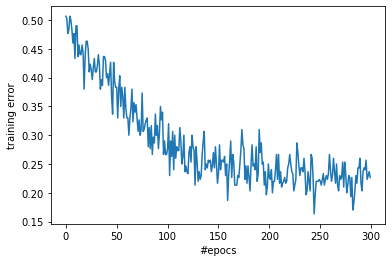

In [26]:
plt.plot(dnn.err_train)
plt.xlabel("#epocs");
plt.ylabel("training error");

#### training accuracy

In [29]:
probs_train, lables_train = dnn.predict(X_train)
dnn.accuracy(lables_train, Y_train)

0.7866666666666666

#### test accuracy

In [31]:
probs_test, lables_test = dnn.predict(X_test)
dnn.accuracy(lables_test, Y_test)

0.73

### PLOTTING THE FEATURE SPACE

(-2.5, 2.5)

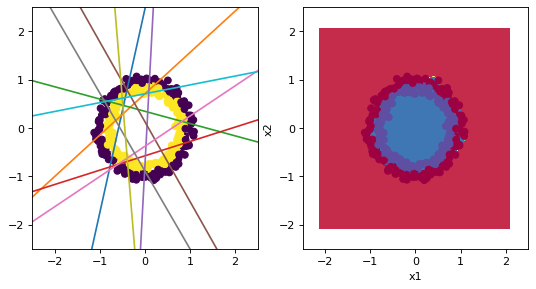

In [32]:
lim = 2.5
t = np.linspace(-lim, lim, 50) 

plt.figure(figsize=(8,4), dpi=80)

# plot layer 1
l = 1
Wl = dnn.W[l]
bl = dnn.b[l]
ax1 = plt.subplot(1,2,1)
#ax1.scatter(X[0,:], X[1,:], c=Y[0,:])
ax1.scatter(dnn.A[l-1][0,:], dnn.A[l-1][1,:], c=Y[0,:])
for i in range(Wl.shape[0]):
    ax1.plot(t, ((-Wl[i,0] * t - bl[i]) / Wl[i,1]))
ax1.set_xlim((-lim, lim))
ax1.set_ylim((-lim, lim))


# Plot the decision boundary
ax2 = plt.subplot(1,2,2)
plot_decision_boundary(lambda x: dnn.predict(x.T)[1], X, Y)
ax2.set_xlim((-lim, lim))
ax2.set_ylim((-lim, lim))

### PLOTTING NEURANS
Each box represents activations of one neuron.
Yellow and purple dots represent samples of the two classes
and the red dot represents activations by a random input.

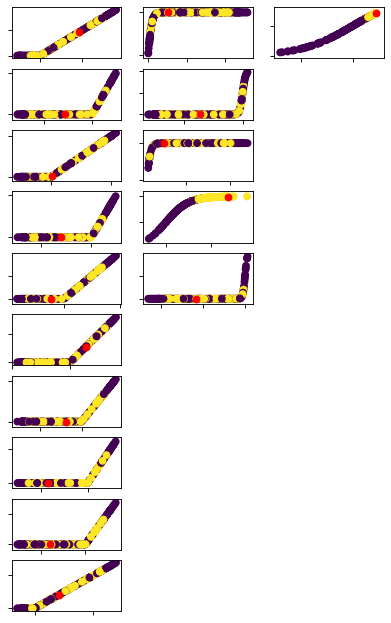

In [33]:
import matplotlib.gridspec as gridspec

prob, label = dnn.predict(X, recover_AZ=False) # to recover

grid_v = max(dnn.num_units[1:])
grid_h = dnn.L - 1

plt.figure(figsize=(grid_h*2, grid_v*1), dpi=80)
G = gridspec.GridSpec(grid_v, grid_h)

ax = []
k = 0

for j in range(1, dnn.L):
    X0 = dnn.Z[j]
    #ymax = (np.max(dnn.A[j], axis=1).reshape(-1,1)) + dnn.epsilon
    #ymax = (np.abs(dnn.A[j]).max(axis=1).reshape(-1,1)) + dnn.epsilon
    ymax = 1
    Y0 = dnn.A[j]/ymax
    for i in range(X0.shape[0]):
        ax.append(plt.subplot(G[i, j-1]))
        ax[k].scatter(X0[i,:], Y0[i,:], c=Y[0,:])
        ax[k].set_yticklabels([])
        k += 1

v = np.random.rand(dnn.X.shape[0], 1)
dnn.predict(v, recover_AZ=False)

k = 0
for j in range(1, dnn.L):
    X0 = dnn.Z[j]
    #ymax = (np.max(dnn.A[j], axis=1).reshape(-1,1)) + dnn.epsilon
    #ymax = (np.abs(dnn.A[j]).max(axis=1).reshape(-1,1)) + dnn.epsilon
    ymax = 1
    Y0 = dnn.A[j]/ymax
    for i in range(X0.shape[0]):
        ax[k].scatter(X0[i,:], Y0[i,:], c='r')
        #ax[k].axis('off')
        ax[k].set_yticklabels([])
        ax[k].set_xticklabels([])
        k += 1


prob, label = dnn.predict(X, recover_AZ=False) # to recover


### PLOTTING RANDOM CROSS-SECTIONS OF THE CLASSIFIER

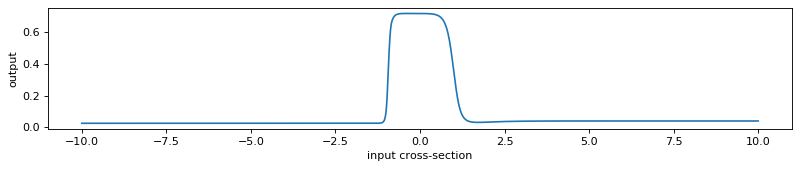

In [34]:
s = 10
b = 0
ls = np.linspace(-1,1,1000) * s

v = np.random.randn(dnn.X.shape[0], 1)
shift =  np.random.rand(1) * b

u = shift + v * ls 

prob, label = dnn.predict(u)

plt.figure(figsize=(12,2), dpi=80)
plt.plot(ls, prob[0,:])
#plt.plot(t, label[0,:])

plt.xlabel("input cross-section");
plt.ylabel("output");

### PLOTTING RANDOM CROSS-SECTIONS OF THE COST FUNCTION 

0.41168206726681067

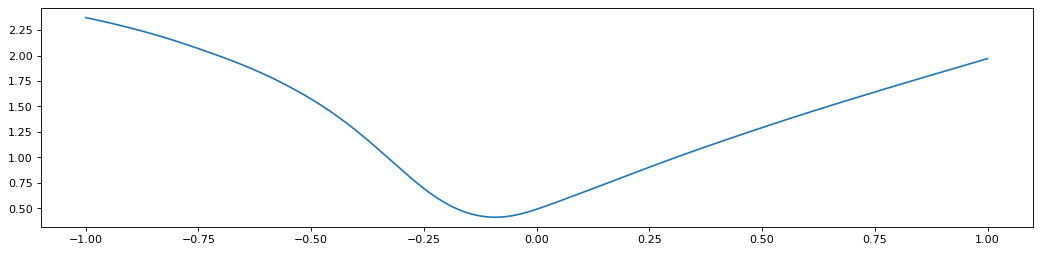

In [35]:
s = 1
b = 0
ls = np.linspace(-1,1,1000) * s
mask = [1] * (dnn.L - 1)
#mask = [1, 1, 1]

w = dnn.W
dw = [None] * (dnn.L)
shift = [None] * (dnn.L)

for l in range(1, dnn.L):
    dw[l] = np.random.randn(w[l].shape[0], w[l].shape[1]) * mask[l-1]
    shift[l] = np.random.randn(w[l].shape[0], w[l].shape[1]) * mask[l-1] * b
    
import copy
W_ = copy.deepcopy(dnn.W)

cost = np.zeros(len(ls))

for i, t in enumerate(ls):
    for l in range(1, dnn.L):
        dnn.W[l] = W_[l] + shift[l] + dw[l] * t
    dnn.forward_propagate()
    cost[i] = dnn.cost(dnn.A[-1], dnn.Y)

dnn.W = W_

fig = plt.figure(figsize=(16,8), dpi=80)
ax1 = plt.subplot(2,1,1)
ax1.plot(ls, cost)
#ax2 = plt.subplot(2,1,2)
#ax2.loglog(ls, cost)
#ax2.plot(ls, np.log(cost))
np.min(cost)